In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# Initialize the file count
count = 0
for dirname, _, filenames in os.walk('/kaggle/input/colonpolyp/colonVideosWithLabels'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # We only want to count the .avi files
        if filename.endswith('.avi'):
            count += 1

print(f"Number of .avi files in directory: {count}")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient120-polyp1-F-26-ascending-nonneoplastic-inflamatuar-5-negative-negative-weak-0-1-42-1.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient27-polyp2-M-63-rectum-neoplastic-tubulovillous-50-negative-negative-negative-60-2-41-70.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient23-polyp1-M-77-sigmoid-nonneoplastic-hyperplastic-20-weak-weak-weak-65-2-54-10.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient34-polyp1-M-59-descending-nonneoplastic-inflamatuar-15-negative-negative-weak-30-2-46-10.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient49-polyp1-M-65-rectum-neoplastic-tubular-50-negative-negative-weak-60-2-43-50.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient180-polyp1-M-66-descending-neoplastic-tubular-15-negative-negative-weak-25-2-48-15.avi
/kaggle/input/colonpolyp/colonVideosWithLabels/colon-patient6-polyp1-F-77-descending-neoplastic-tubular-60-negati

In [2]:
import cv2  # video işlemleri için
import pandas as pd
import os

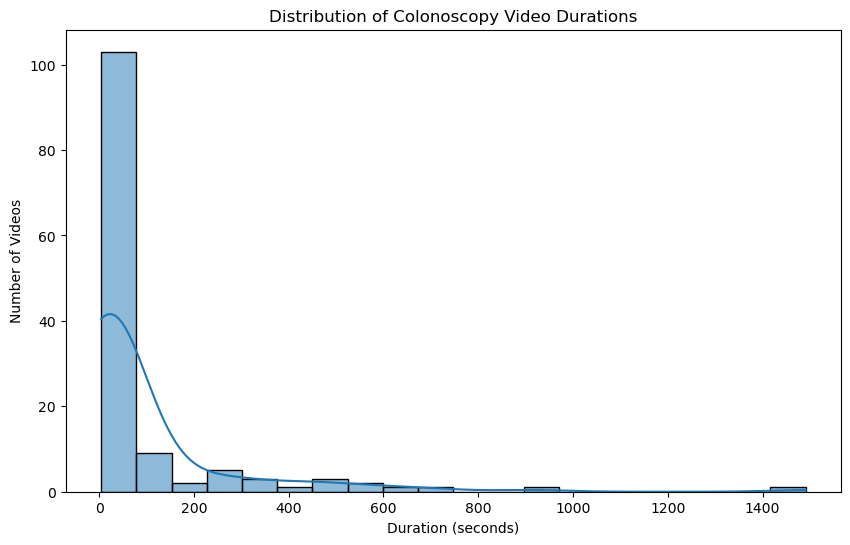

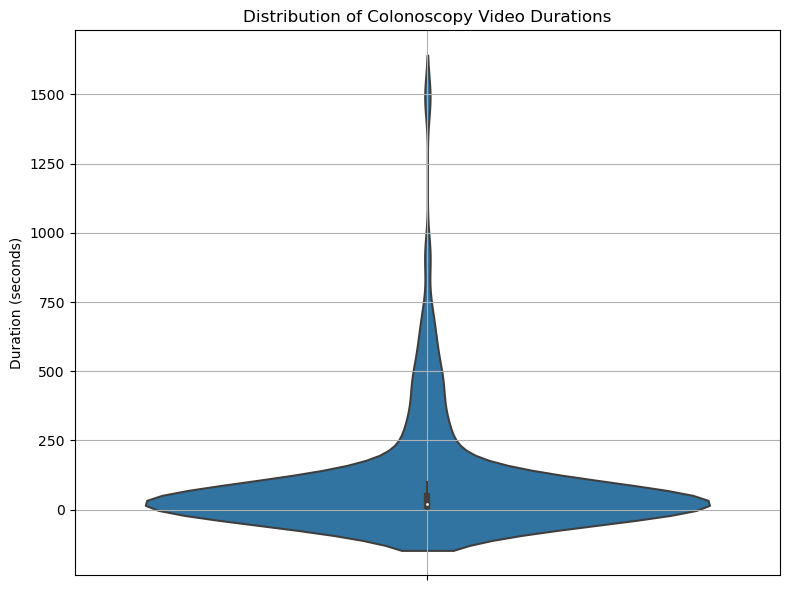

In [4]:
video_info = []

for dirname, _, filenames in os.walk('/kaggle/input/colonpolyp/colonVideosWithLabels'):
    for filename in filenames:
        if filename.endswith('.avi'):
            filepath = os.path.join(dirname, filename)
            cap = cv2.VideoCapture(filepath)
            
            if cap.isOpened():
                fps = cap.get(cv2.CAP_PROP_FPS)
                frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
                duration_sec = frame_count / fps if fps else 0
                
                video_info.append({
                    'filename': filename,
                    'duration_seconds': duration_sec
                })
                
            cap.release()

# DataFrame oluştur
video_df = pd.DataFrame(video_info)

import matplotlib.pyplot as plt
import seaborn as sns
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(video_df['duration_seconds'], bins=20, kde=True)
plt.title('Distribution of Colonoscopy Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Videos')

# Save before show
output_path = '/kaggle/working/histogram.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(y=video_df['duration_seconds'])
plt.title('Distribution of Colonoscopy Video Durations')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.tight_layout()

# Save before show
output_path = '/kaggle/working/violin.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()



In [6]:
file_path = "/kaggle/input/colonpolyp/colonVideosWithLabels.xlsx"
df = pd.read_excel(file_path)
# Find the number of unique patients
unique_patients = df['patient'].nunique()

# Find the unique combinations of patients and polyps
unique_patient_polyp_combinations = df.groupby(['patient', 'polyp']).size().reset_index().rename(columns={0: 'count'})

# Print the results
print("Number of Unique Patients:", unique_patients)
print("Number of Unique Polyps:", df['polyp'].count().sum())

Number of Unique Patients: 132
Number of Unique Polyps: 133


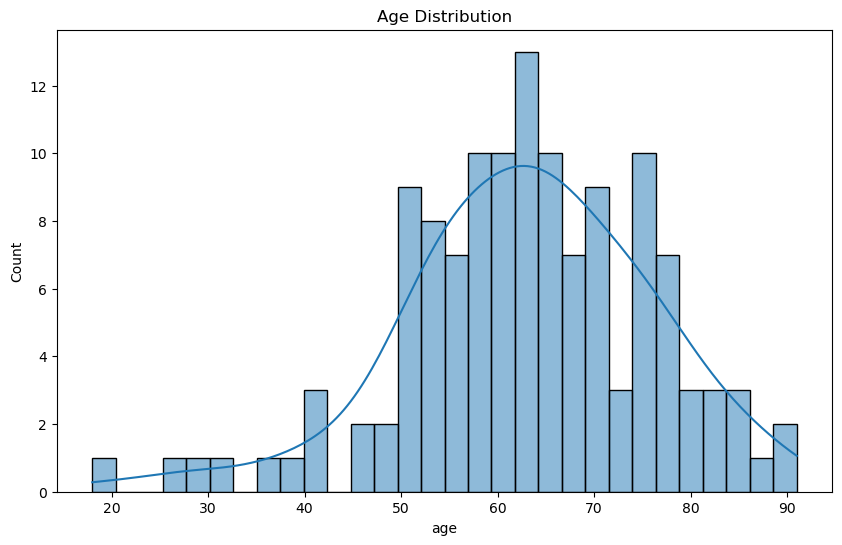

Age Range:  62.94 +/- 12.96


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
output_path = '/kaggle/working/age.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()

mean_age = df['age'].mean()
std_age = df['age'].std()

age_range = f"{mean_age:.2f} +/- {std_age:.2f}"

print("Age Range: ", age_range)

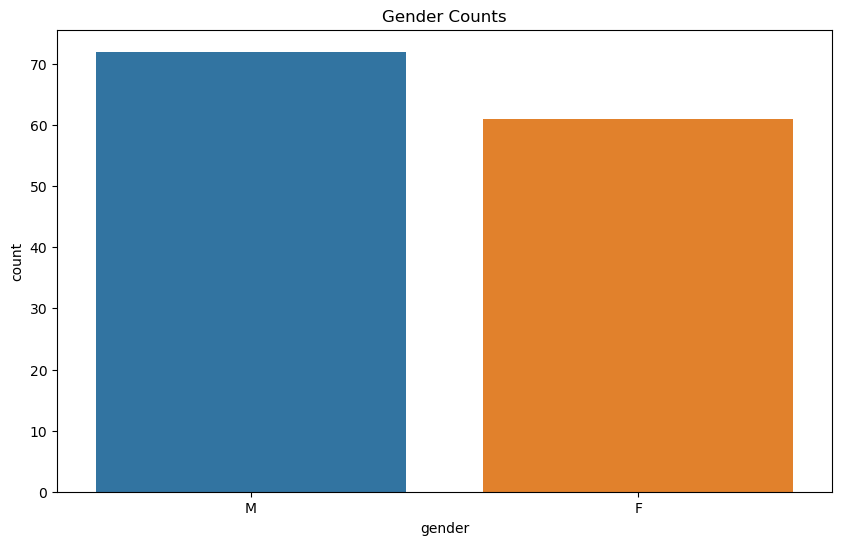

Male Count: 72
Female Count: 61


In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='gender')
plt.title('Gender Counts')
output_path = '/kaggle/working/gender.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


male_count = df[df['gender'] == 'M'].shape[0]
female_count = df[df['gender'] == 'F'].shape[0]
print("Male Count:", male_count)
print("Female Count:", female_count)

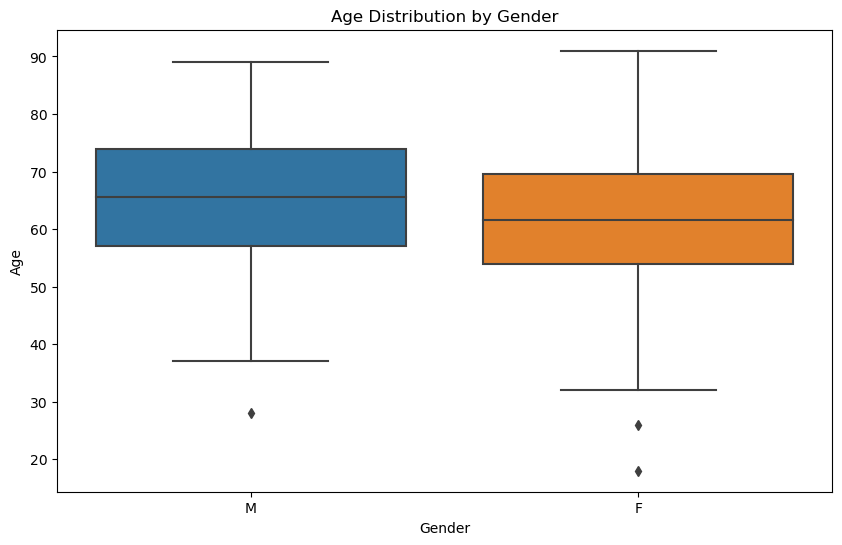

In [27]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


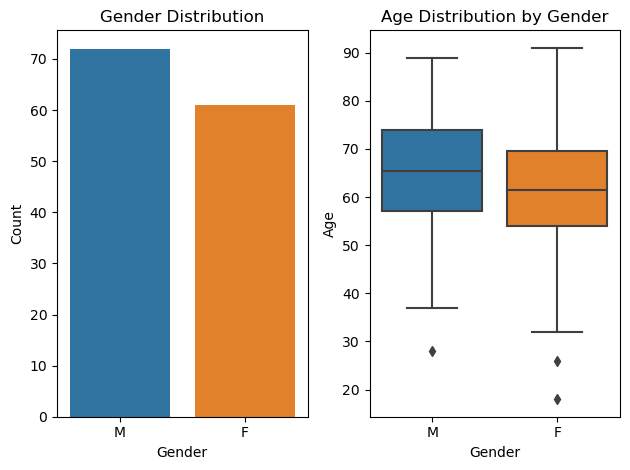

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axes
fig, axs = plt.subplots(1,2)

# Bar plot (top subplot)
sns.countplot(data=df, x='gender', ax=axs[0])
axs[0].set_title('Gender Distribution')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')

# Box plot (bottom subplot)
sns.boxplot(x='gender', y='age', data=df, ax=axs[1])
axs[1].set_title('Age Distribution by Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Age')

# Adjust layout
plt.tight_layout()
output_path = '/kaggle/working/agebyGender.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


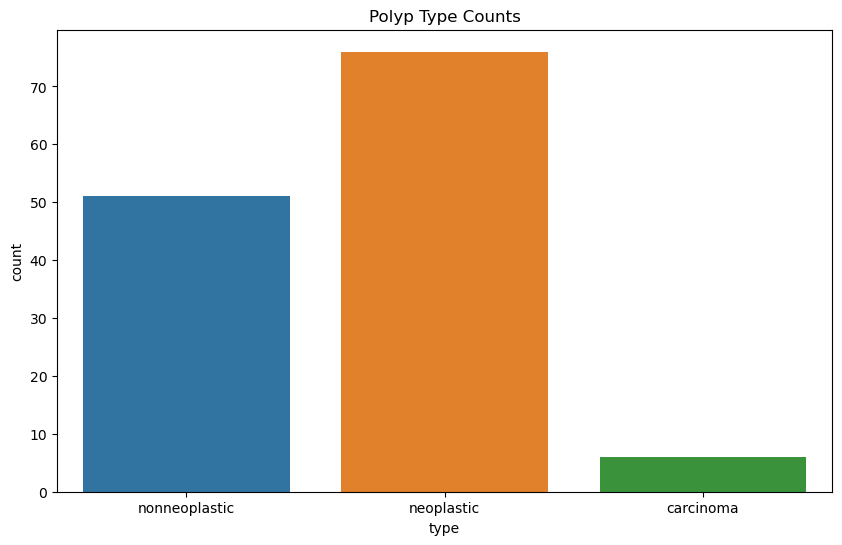

neoplastic       76
nonneoplastic    51
carcinoma         6
Name: type, dtype: int64


In [17]:
df.loc[df['type'] == 'carcinom', 'type'] = 'carcinoma'
# Calculate the counts of polyp types
polyp_type_counts = df['type'].value_counts()

# Bar plot showing the count of polyp types
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type')
plt.title('Polyp Type Counts')
output_path = '/kaggle/working/polyp_type_countsColon.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


# Print the results
print(polyp_type_counts)

In [18]:
df.loc[df['subtype'] == 'serrated', 'subtype'] = 'hyperplastic'
df.loc[df['subtype'] == 'normal', 'subtype'] = 'hyperplastic'

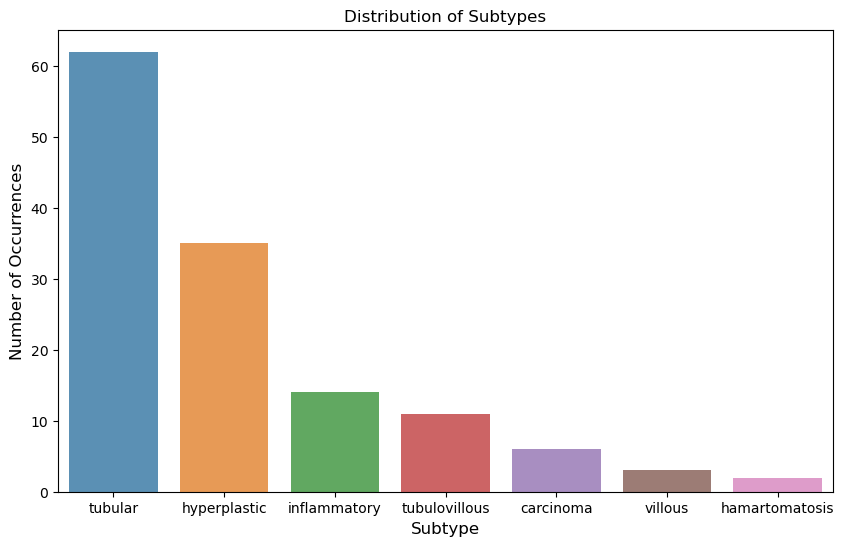

          subtype  count
0       carcinoma      6
1  hamartomatosis      2
2    hyperplastic     35
3    inflammatory     14
4         tubular     62
5   tubulovillous     11
6         villous      3


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'
df.loc[df['subtype'] == 'carcinom', 'subtype'] = 'carcinoma'

# Get the distribution of values in the 'subtype' column
subtype_distribution = df['subtype'].value_counts()

# Get the names and counts of the subtypes as separate lists
subtypes = subtype_distribution.index.tolist()
counts = subtype_distribution.values.tolist()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=subtypes, y=counts, alpha=0.8)

plt.title('Distribution of Subtypes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Subtype', fontsize=12)

output_path = '/kaggle/working/polyp_subtype_countsColon.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


import pandas as pd

# Perform grouping to count polyp subtypes
polyp_subtype_counts = df.groupby('subtype').size().reset_index(name='count')

# Print the results using DataFrame
print(polyp_subtype_counts)

Key frame extraction using renet50

In [32]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import os

# Video yolu
video_path = '/kaggle/input/colonpolyp/colon-patient10-polyp1-M-83-rectum-neoplastic-tubulovillous-70-negative-negative-weak-50-2-58-50.avi'

# Key frame'lerin çıkarılacağı model
base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Videoyı aç
video = cv2.VideoCapture(video_path)

# Key frame'leri saklamak için bir liste oluştur
key_frames = []

# İlgilenilen frame aralığı ve adım sayısı
start_frame = 0
end_frame = 1000
step = 10

# Her bir çerçeveyi işle
for frame_num in range(start_frame, end_frame, step):
    # İstenilen çerçeveye git
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    
    # Çerçeveyi oku
    ret, frame = video.read()
    if not ret:
        break
    
    # Çerçeveyi ön işleme
    frame = cv2.resize(frame, (224, 224))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame / 255.0
    frame = np.expand_dims(frame, axis=0)
    
    # Çerçeveden özellik vektörü çıkar
    features = model.predict(frame)
    
    # Key frame olarak kabul edilecek bir eşik değeri belirleyin
    threshold = 0.5
    
    # Eğer özellik vektörü eşik değerinden büyükse, çerçeveyi key frame olarak kabul edin
    if np.max(features) > threshold:
        key_frames.append(frame[0])

# Key frame'leri kaydetmek için bir klasör oluştur
output_folder = 'keyframes'
os.makedirs(output_folder, exist_ok=True)

# Key frame'leri kaydet
for i, frame in enumerate(key_frames):
    frame_path = os.path.join(output_folder, f'frame_{i+1}.jpg')
    cv2.imwrite(frame_path, cv2.cvtColor(np.uint8(frame*255), cv2.COLOR_RGB2BGR))
    print(f'Saved key frame {i+1}')

# Belleği serbest bırak
video.release()


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

94765736/94765736 [==============================] - 0s 0us/step


In [33]:
import cv2
import numpy as np
import os

# Key frame'lerin bulunduğu klasör
keyframes_folder = '/kaggle/working/keyframes'

# Key frame'leri oku
keyframe_files = os.listdir(keyframes_folder)

# Key frame'leri göster
for keyframe_file in keyframe_files:
    keyframe_path = os.path.join(keyframes_folder, keyframe_file)
    keyframe = mpimg.imread(keyframe_path)
    
    plt.imshow(keyframe)
    plt.axis('off')
    plt.show()



In [34]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Video yolu
video_path = '/kaggle/input/colonpolyp/colon-patient101-polyp1-F-63-sigmoid-neoplastic-tubular-25-negative-negative-weak-20-1-30-10.avi'
# Key frame'lerin çıkarılacağı model
base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Videoyı aç
video = cv2.VideoCapture(video_path)

# Key frame'leri saklamak için bir liste oluştur
key_frames = []

# İlgilenilen frame aralığı ve adım sayısı
start_frame = 0
end_frame = 1000
step = 10

# Her bir çerçeveyi işle
for frame_num in range(start_frame, end_frame, step):
    # İstenilen çerçeveye git
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    
    # Çerçeveyi oku
    ret, frame = video.read()
    if not ret:
        break
    
    # Çerçeveyi ön işleme
    frame = cv2.resize(frame, (500,500))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame / 255.0
    frame = np.expand_dims(frame, axis=0)
    
    # Çerçeveden özellik vektörü çıkar
    features = model.predict(frame)
    
    # Key frame olarak kabul edilecek bir eşik değeri belirleyin
    threshold = 0.5
    
    # Eğer özellik vektörü eşik değerinden büyükse, çerçeveyi key frame olarak kabul edin
    if np.max(features) > threshold:
        key_frames.append(frame[0])

# Key frame'leri kaydetmek için bir klasör oluştur
output_folder = 'keyframes'
os.makedirs(output_folder, exist_ok=True)

# Key frame'leri kaydet
for i, frame in enumerate(key_frames):
    frame_path = os.path.join(output_folder, f'frame_{i+1}.jpg')
    cv2.imwrite(frame_path, cv2.cvtColor(np.uint8(frame*255), cv2.COLOR_RGB2BGR))
    print(f'Saved key frame {i+1}')

# Belleği serbest bırak
video.release()




In [35]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import os

# Path to the video directory
video_dir = '/kaggle/input/colonpolyp'

# Key frame extraction parameters
start_frame = 0
step = 10
threshold = 0.5

# Key frame extraction model
base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Iterate over all video files in the directory
for video_file in os.listdir(video_dir):
    video_path = os.path.join(video_dir, video_file)

    # Open the video
    video = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the end frame
    end_frame = total_frames - 1

    # Key frames for the current video
    key_frames = []

    # Iterate over each frame in the video
    for frame_num in range(start_frame, end_frame, step):
        # Set the desired frame
        video.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

        # Read the frame
        ret, frame = video.read()
        if not ret:
            break

        # Preprocess the frame
        frame = cv2.resize(frame, (224, 224))
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = frame / 255.0
        frame = np.expand_dims(frame, axis=0)

        # Extract features from the frame
        features = model.predict(frame)

        # Check if the frame is a key frame
        if np.max(features) > threshold:
            key_frames.append(frame[0])

   


1/1 [==============================] - 4s 4s/step


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /kaggle/input/colonpolyp/ihcData.xlsx in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /kaggle/input/colonpolyp/colonVideosWithLabels in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:

Sure, let's break down the process into steps to achieve your objectives:

1. Key Frame Extraction:
   - Create a function to extract key frames from a video using a deep learning algorithm.
   - Optimize the algorithm to improve key frame selection.

2. Classification Models:
   - Extract the labels (neoplastic, nonneoplastic, carcinomas) from the video names.
   - Create different classification models to classify the extracted labels.
   - Evaluate the performance of each classification model.

3. Comparison and Visualization:
   - Compare the performance of different classification models using tables and graphs.

Here's an outline of the code to achieve these steps:


# Step 1: Key Frame Extraction
def extract_keyframes(video_path, start_frame=0, end_frame=1000, step=10):
    # Key frame extraction code here

In [36]:
import cv2
import numpy as np
import os
from tensorflow.keras.applications import ResNet50
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def extract_keyframes(video_folder, start_frame=0, end_frame=1000, step=10, save_folder='keyframes'):
    # Create save folder if it doesn't exist
    os.makedirs(save_folder, exist_ok=True)
    
    # Load pre-trained ResNet50 model
    base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
    model = Model(inputs=base_model.input, outputs=base_model.output)
    
    # Iterate over videos in the folder
    for video_file in os.listdir(video_folder):
        video_path = os.path.join(video_folder, video_file)
        
        # Open video capture
        video = cv2.VideoCapture(video_path)
        
        # Frame counter
        frame_count = 0
        
        # Iterate over frames
        while True:
            # Read frame from video
            ret, frame = video.read()
            
            # Check if frame is read successfully
            if not ret:
                break
            
            # Process frame
            if frame_count >= start_frame:
                # Preprocess frame for ResNet50 input
                frame = cv2.resize(frame, (224, 224))
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame = frame.astype(np.float32) / 255.0
                frame = np.expand_dims(frame, axis=0)
                
                # Extract features from frame using ResNet50
                features = model.predict(frame)
                
                # Append key frame if features meet threshold
                threshold = 0.5
                if np.max(features) > threshold:
                    # Save keyframe
                    if (frame_count - start_frame) % step == 0 and frame_count <= end_frame:
                        frame_name = f"{video_file}_frame_{frame_count}.jpg"
                        save_path = os.path.join(save_folder, frame_name)
                        cv2.imwrite(save_path, frame[0])
            
            frame_count += 1
        
        # Release video capture
        video.release()


In [37]:
video_folder = '/kaggle/input/colonpolyp/'
start_frame = 0
end_frame = 1000
step = 10
save_folder = 'keyframes'

extract_keyframes(video_folder, start_frame, end_frame, step, save_folder)


1/1 [==============================] - 0s 20ms/step


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /kaggle/input/colonpolyp/ihcData.xlsx in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /kaggle/input/colonpolyp/colonVideosWithLabels in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:

# Step 2: Classification Models
def create_classification_model():
    # Create your classification model here

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_classification_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [39]:
pip install --upgrade tensorflow tensorflow-io


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 78.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 103.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.8/405.8 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uni

In [40]:
pip install tensorflow tensorflow-io


Note: you may need to restart the kernel to use updated packages.


# Step 3: Comparison and Visualization
def compare_classification_models(models, X_test, y_test):
    # Compare the performance of different classification models

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

def compare_classification_models(models, X_train, y_train, X_test, y_test):
    train_scores = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'AUC': []
    }
    
    test_scores = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'AUC': []
    }
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the training data
        y_train_pred = model.predict(X_train)
        
        # Calculate metrics for training data
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_auc = roc_auc_score(y_train, y_train_pred)
        
        # Append metrics to train_scores dictionary
        train_scores['Accuracy'].append(train_accuracy)
        train_scores['Precision'].append(train_precision)
        train_scores['Recall'].append(train_recall)
        train_scores['AUC'].append(train_auc)
        
        # Make predictions on the test data
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics for test data
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_pred)
        
        # Append metrics to test_scores dictionary
        test_scores['Accuracy'].append(test_accuracy)
        test_scores['Precision'].append(test_precision)
        test_scores['Recall'].append(test_recall)
        test_scores['AUC'].append(test_auc)
        
        print(f"Model: {model_name}")
        print(f"Training Scores:")
        print(f"  Accuracy: {train_accuracy}")
        print(f"  Precision: {train_precision}")
        print(f"  Recall: {train_recall}")
        print(f"  AUC: {train_auc}")
        print(f"Test Scores:")
        print(f"  Accuracy: {test_accuracy}")
        print(f"  Precision: {test_precision}")
        print(f"  Recall: {test_recall}")
        print(f"  AUC: {test_auc}")
        print("-----------------------")
    
    # Visualize the metrics
    model_names = list(models.keys())
    metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.ravel()
    
    for i, metric in enumerate(metrics):
        ax = axs[i]
        train_scores_list = train_scores[metric]
        test_scores_list = test_scores[metric]
        
        ax.bar(model_names, train_scores_list, label='Training')
        ax.bar(model_names, test_scores_list, label='Test')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} Comparison')
        ax.legend()
    
    plt.tight_layout()
    plt.show()


In [42]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def extract_keyframes(video_folder, start_frame=0, end_frame=1000, step=10):
    # Load pre-trained ResNet50 model
    base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
    model = Model(inputs=base_model.input, outputs=base_model.output)
    
    # Initialize key frames list
    key_frames = []
    
    # Iterate over videos in the folder
    for video_file in os.listdir(video_folder):
        video_path = os.path.join(video_folder, video_file)
        
        # Open video capture
        video = cv2.VideoCapture(video_path)
        
        # Iterate over frames
        for frame_num in range(start_frame, end_frame, step):
            # Set video frame position
            video.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
            
            # Read frame from video
            ret, frame = video.read()
            
            # Check if frame is read successfully
            if not ret:
                break
            
            # Preprocess frame for ResNet50 input
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = frame.astype(np.float32) / 255.0
            frame = np.expand_dims(frame, axis=0)
            
            # Extract features from frame using ResNet50
            features = model.predict(frame)
            
            # Append key frame if features meet threshold
            threshold = 0.5
            if np.max(features) > threshold:
                key_frames.append(frame[0])
        
        # Release video capture
        video.release()
    
    return key_frames

def create_classification_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def compare_classification_models(models, X_train, y_train, X_test, y_test):
    train_scores = []
    test_scores = []
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Evaluate the model on the training data
        train_score = model.evaluate(X_train, y_train, verbose=0)[1]
        train_scores.append(train_score)
        
        # Evaluate the model on the test data
        test_score = model.evaluate(X_test, y_test, verbose=0)[1]
        test_scores.append(test_score)
        
        print(f"Model: {model_name}")
        print(f"Training Score: {train_score}")
        print(f"Test Score: {test_score}")
        print("-----------------------")
    
    # Visualize the training and test scores
    model_names = list(models.keys())
    x = range(len(model_names))
    width = 0.35
    
    fig, ax = plt.subplots()
    ax.bar(x, train_scores, width)


In [43]:
video_folder = '/kaggle/input/colonpolyp'  # Key frame'leri çıkaracağınız video klasörü
start_frame = 0  # Başlangıç çerçevesi
end_frame = 1000  # Bitiş çerçevesi
step = 10  # Adım sayısı

result = extract_keyframes(video_folder, start_frame, end_frame, step)
key_frames = result[0]  # Assign the first value to key_frames
labels = result[1]  # Assign the second value to labels


1/1 [==============================] - 0s 22ms/step


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /kaggle/input/colonpolyp/ihcData.xlsx in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /kaggle/input/colonpolyp/colonVideosWithLabels in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:

In [44]:
result

[array([[[0.24313726, 0.24313726, 0.24313726],
         [0.        , 0.        , 0.        ],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.61960787, 0.61960787, 0.61960787],
         [0.        , 0.        , 0.        ],
         [0.23921569, 0.23921569, 0.23921569],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.02352941, 0.02352941, 0.02352941],
         [0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [45]:
from sklearn.model_selection import train_test_split

def split_polyp_frames(key_frames, labels, test_size=0.2):
    # Split the key frames and labels into train and test sets
    train_frames, test_frames, train_labels, test_labels = train_test_split(key_frames, labels, test_size=test_size, stratify=labels)
    
    return train_frames, test_frames, train_labels, test_labels
train_frames, test_frames = split_polyp_frames(key_frames, labels, test_size=0.2)


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
X_train = np.array(train_frames)
y_train = np.array([1] * len(train_frames))  # Sınıf etiketleri (1: Polip, 0: Polip değil)

X_test = np.array(test_frames)
y_test = np.array([1] * len(test_frames))  # Sınıf etiketleri (1: Polip, 0: Polip değil)
